# The Advection Equation
The advection equation is given by:

$$
\partial_t u(t,x) +a \partial_x u(t,x) =0
$$

## Jacobian

The Jacobian is trivially,

$$
A(x) = a
$$

with eigen-value $a$ and eigen-vector $1$.

## The Riemann Problem
### Characteristic curves
**Characteristic Curves** : Curves in the domain along which the PDE becomes an ODE

The linear advection equation becomes an ode along the curve $(t(s),x(s)) = (s, a s+x_0)$, since

$$
\mathrm{d}_s u = \partial_s t\;\partial_t u+ \partial_s x\;\partial_x u = \partial_t u + a \partial_x u = 0
$$

Thus $u=\text{constant}$ along the characteristic curves

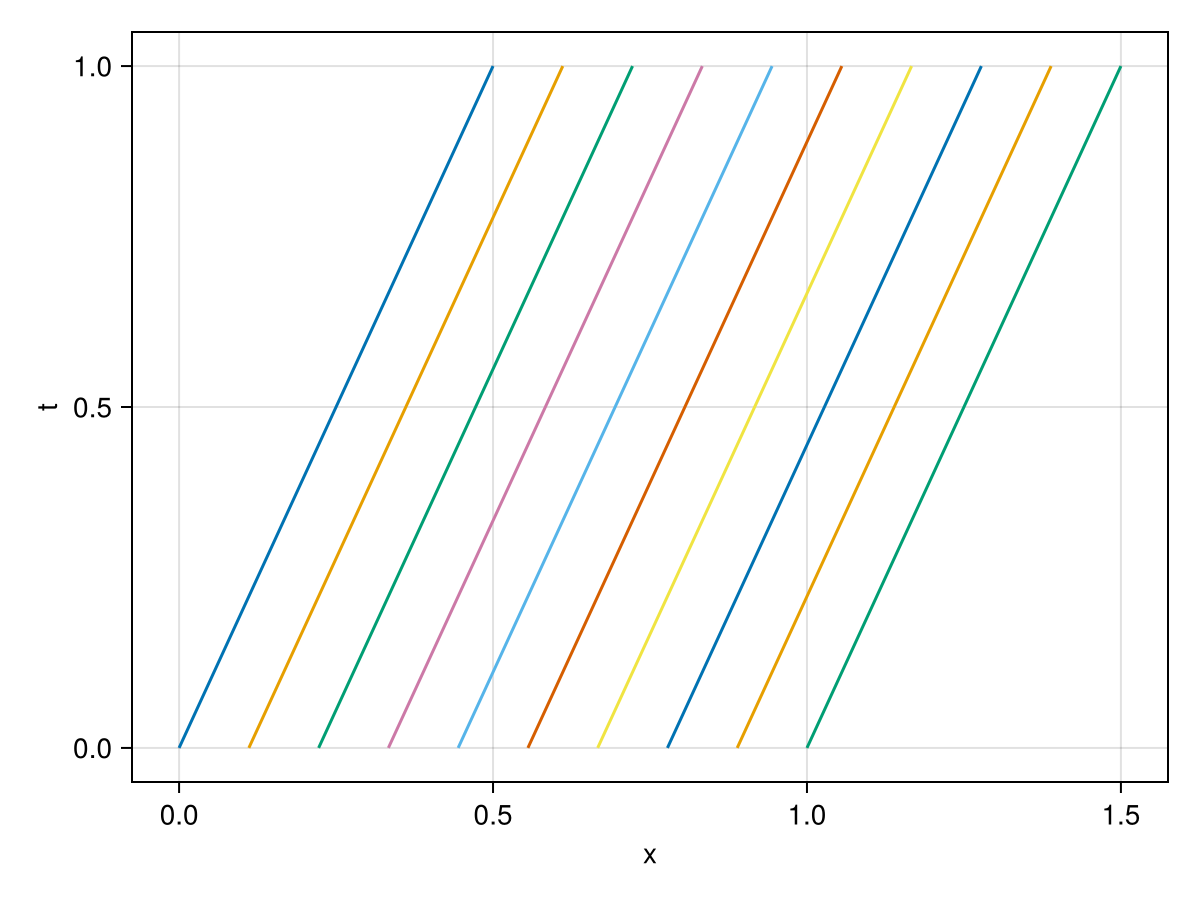

CairoMakie.Screen{IMAGE}


In [30]:
using CairoMakie

function characteristic(s, x0; a = 0.5)
    return (x0 + a * s, s)
end

fig = Figure();
ax = Axis(fig[1, 1], ylabel = "t", xlabel = "x")
for x0 in range(0, 1, length=10)
    curve = characteristic.(range(0,1,length=10), x0)
    lines!(ax, curve)
end
display(fig)

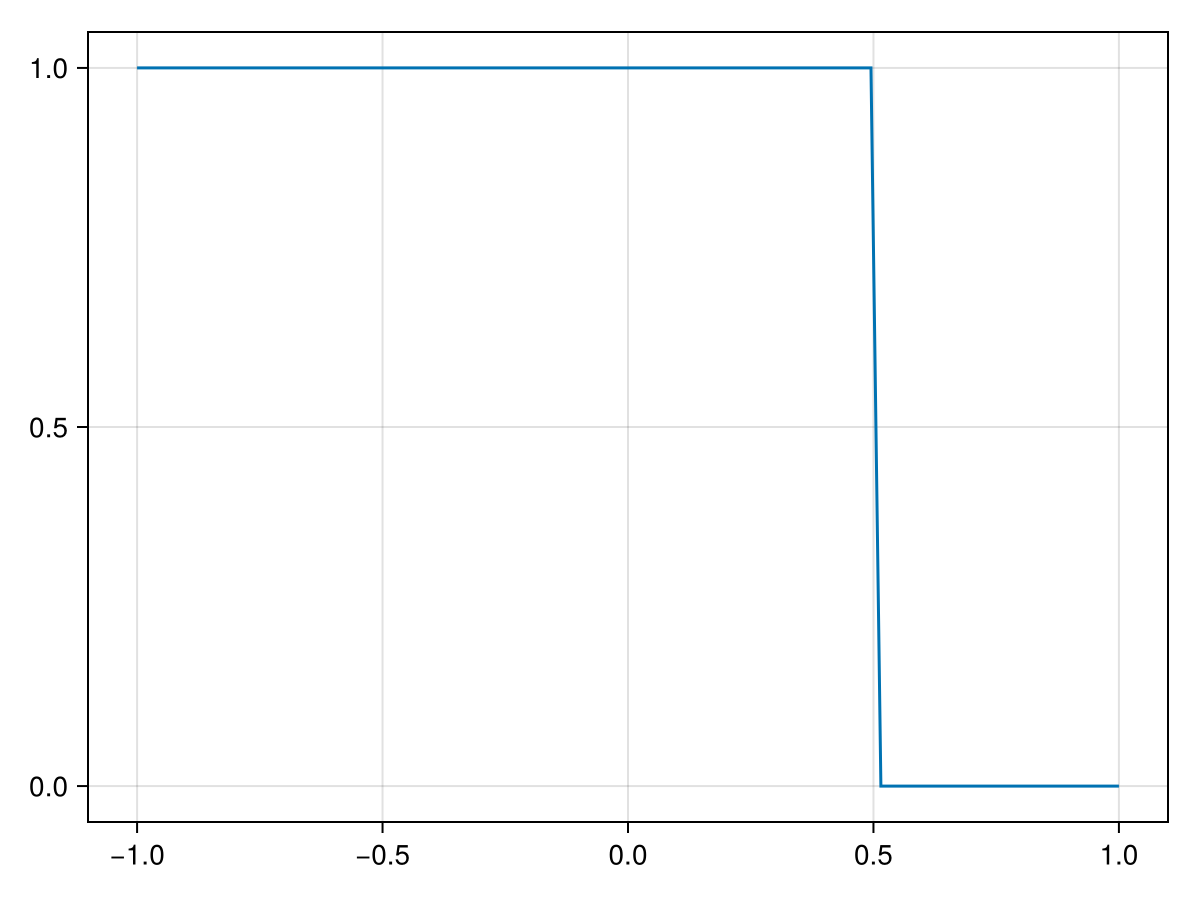

In [63]:
using IJulia

x_domain = range(-1, 1, length=100)

function check_riemann_sol(t,x;uL=1, uR=0, x0=0, a=0.5)
    sig_characteristic = characteristic(t, x0; a=a)
    map(x -> x < sig_characteristic[1] ? uL : uR, x)
end

for t in range(0, 1, length=100)
    sol_t = check_riemann_sol.(t, x_domain)
    IJulia.clear_output(true)
    lines(x_domain, sol_t) |> display
end

## Upwind Scheme

The upwind scene is defined by the discretizations:

$$
\partial_t u(x) -a \partial_x u(x) \rightarrow\frac{u^{n+1}_i-u^{n}_i}{\Delta t} +a \frac{u^{n}_{i}-u^{n}_{i-1}}{\Delta x}
$$

for $a>0$.



### Truncation Error
__Truncation error__ : The difference accumulated by the numerical scheme when comparted to the original pde.

The Taylor expansions are:

$$
\begin{aligned}
u_i^{n+1}&=u_i^n+\Delta t \partial_t u|_i ^n+\frac{\Delta t^2}{2} \partial_t^2 u|_i^n+\frac{\Delta t^3}{3!} \partial^3_t u|_i^n+\frac{\Delta t^4}{4!} \partial^4_t u|_i^n+\frac{\Delta t^5}{5!} \partial^5_t u|_i ^n \\
u_{i+1}^n&=u_i^n+\Delta x \partial_x u|_i ^n+\frac{\Delta x^2}{2} \partial^2_x u|_i ^n+\frac{\Delta x^3}{3!} \partial^3_x u|_i ^n+\frac{\Delta x^4}{4!} \partial^4_x u|_i ^n+\frac{\Delta x^5}{5!} \partial^5_x u|_i^n \\
u_{i-1}^n&=u_i^n-\Delta x \partial_x u|_i ^n+\frac{\Delta x^2}{2} \partial^2_x u|_i^n-\frac{\Delta x^3}{3!} \partial^3_x u|_i^n+\frac{\Delta x^4}{4!} \partial^4_x u|_i^n-\frac{\Delta x^5}{5!} \partial^5_x u|_i^n
\end{aligned}
$$

It follows that

$$
\epsilon_T=\frac{u^{n+1}_i-u^{n}_i}{\Delta t} + a\frac{u^{n}_{i}-u^{n}_{i-1}}{\Delta x} - \left(\partial_t u(x)|_i^n +a \partial_x u(x)|_i^n\right) = \frac{\Delta t}{2}\partial_t^2 u - a \frac{\Delta x}{2}\partial^2_x u +\mathcal O(\Delta t^2)+\mathcal O(\Delta x^2)
$$
The upwind scheme is consistent since,
$$\lim_{\Delta t,\Delta x \to 0}\epsilon_T=0.$$



### Modified Differential Equation
__Modified PDE__ : A PDE generated when the exact solution to the numerical scheme is inserted into the left hand side of the original PDE. Since the numerical scheme does not satisfy the PDE exactly, it usually generates additional terms that have intepretations, *e.g. Additional diffusivity terms can appear*.

The exact solution to the upwind scheme satisfies
$$
\frac{\bar u^{n+1}_i-\bar u^{n}_i}{\Delta t} + a\frac{\bar u^{n}_{i}-\bar u^{n}_{i-1}}{\Delta x} = 0
$$
Plugging the exact solution to the numerical scheme into the left hand side of the pde gives:

$$
\partial_t\bar u|_i ^n + a\partial_x\bar u|_i ^n
=-\frac{\Delta t}{2} \partial_t^2\bar u|_i^n+a\frac{\Delta x}{2} \partial^2_x\bar u|_i ^n +\mathcal O(\Delta t^2)+\mathcal O(\Delta x^2)
$$
This relationship can be arrange to show that to first order $\partial_t^2u|^n_i$ acts like,
$$
\partial_t^2\bar u=a^2\partial_x^2\bar u+\mathcal O(\Delta t)+\mathcal O(\Delta x).
$$
Thus, we get a modified PDE of the form,
$$
\partial_t\bar u|_i ^n + a\partial_x\bar u|_i ^n
=\left(a\frac{\Delta x}{2}-a^2\frac{\Delta t}{2} \right) \partial^2_x\bar u|_i ^n +\mathcal O(\Delta t^2)+\mathcal O(\Delta x^2)
$$
which has an numerical diffusivity coefficient of $a\frac{\Delta x}{2}\left(1-a\frac{\Delta t}{\Delta x}\right)$.

#### Courant-Friedrichs-Lewy (CFL) number
From the numerical diffusivity coefficient, we require a CFL number of
$$
    \sigma = \frac{a\Delta t}{\Delta x} < 1
$$
to ensure stability.


### von Neumann Stability Analysis
__von Neumann Stability Analysis__ : Study stability from the Fourier series of the numerical solution

The numerical approximation to the exact solution of the numerical scheme will differ by some error,

$$
\bar u^n_i = u^n_i +\bar \epsilon^n_i
$$

If the discretized equation $N$ is linear, then it's effect on the error is linear,

$$
N(\bar u^n_i) = N(u^n_i) +N(\epsilon^n_i)
$$

#### Stability Condition:

A scheme is stable if the ratio of the fourier amplitudes of the approximation are bounded above by $1$.
i.e., for $u^n_i =\sum_jV_j^N e^{ik_jx_i}$, then

$$\left\lvert\frac{V^{n+1}_j}{V^n_j}\right\rvert\leq 1$$

Thus for our upwind scheme, we find,
$$
\begin{aligned}
    V^{n+1}_je^{ik_jx_{i}}
        &=V^{n}_je^{ik_jx_{i}}+\sigma V^n_j\left(e^{ik_jx_{i}}-e^{ik_jx_{i-1}}\right)\\
    \implies V^{n+1}_j
        &=V^{n}_j+\sigma V^n_j\left(1-e^{-ik_j\Delta x}\right)\\
    \implies\left\lvert\frac{V^{n+1}_j}{V^n_j}\right\rvert
        &=\sqrt{\sigma^2+(1-\sigma)^2+2\sigma(1-\sigma)\cos(k_j\Delta x)}
\end{aligned}
$$

which implies $0\leq \sigma \leq 1$.


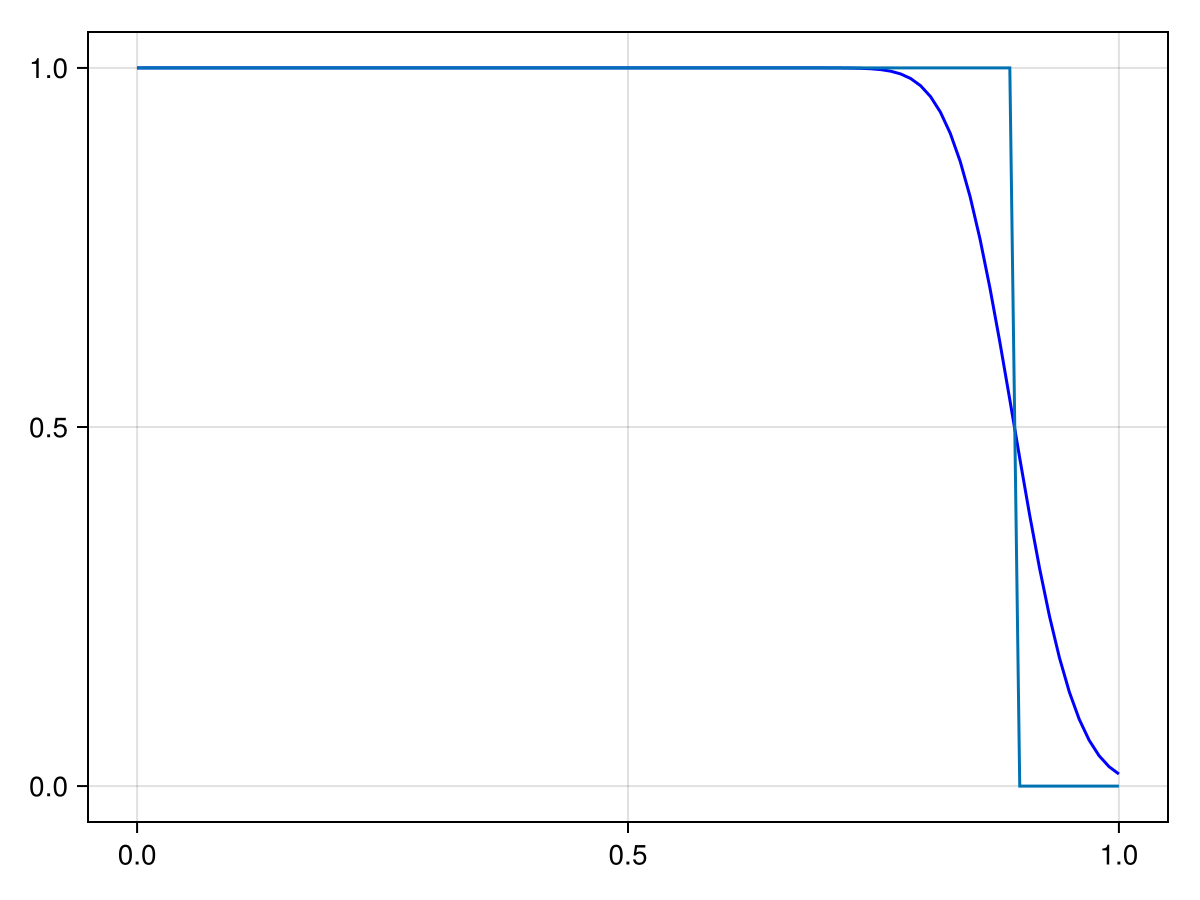

In [75]:
using CairoMakie
using IJulia
L = 100
xf = 1.0
xi = 0.0
Δx = (xf - xi)/L
cfl = 0.4
a = 1.0  
Δt = cfl * Δx / a
x = range(xi, xf, length=L)
u = zeros(L)
u_prev = zeros(L)

function initial_conditions(u_prev)
    for i in 1:L
        u_prev[i] = i < L/2 ? 1.0 : 0.0
    end
end

function boundary_conditions(u)
    u[1] = 1.0
    u[end] = 0.0
end

initial_conditions(u_prev)
boundary_conditions(u_prev)
boundary_conditions(u)

function time_step(u, u_prev; a=1.0)
    σ = a * Δt / Δx
    for (I) in 2:L
        u[I] = u_prev[I] - σ * (u_prev[I] - u_prev[I-1])
    end
    u_prev .= u
    return
end
function riemann_time_step(t, x;a=1.0)
   return check_riemann_sol.(t, x; uL=1, uR=0, x0=0.5, a=a)

end

for i in 1:100
    plt = time_step(u, u_prev)
    t = (i-1) * Δt
    IJulia.clear_output(true)
    plt = lines(x, u, color=:blue, label="upwind scheme") 
    lines!(plt.axis, x, riemann_time_step(t, x), label="truth")
    plt |> display

end

In [49]:
Δt

0.4